In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



import re
from nltk.corpus import stopwords
import string

import keras
from tensorflow.keras.preprocessing.text import Tokenizer

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten,Dropout
from keras.layers import Embedding
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from tensorflow.keras.optimizers import Adam

In [ ]:
def load_data(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text
data = load_data("/content/got1.txt")

In [ ]:
data

'A Game Of Thrones \nBook One of A Song of Ice and Fire \nBy George R. R. Martin \nPROLOGUE \n"We should start back," Gared urged as the woods began to grow dark around them. "The wildlings are \ndead." \n"Do the dead frighten you?" Ser Waymar Royce asked with just the hint of a smile. \nGared did not rise to the bait. He was an old man, past fifty, and he had seen the lordlings come and go. \n"Dead is dead," he said. "We have no business with the dead." \n"Are they dead?" Royce asked softly. "What proof have we?" \n"Will saw them," Gared said. "If he says they are dead, that\'s proof enough for me." \nWill had known they would drag him into the quarrel sooner or later. He wished it had been later rather \nthan sooner. "My mother told me that dead men sing no songs," he put in. \n"My wet nurse said the same thing, Will," Royce replied. "Never believe anything you hear at a woman\'s \ntit. There are things to be learned even from the dead." His voice echoed, too loud in the twilit fores

In [ ]:
def clean_text(text):
    cleaned_words = [word.lower() for word in text.split() if word.isalpha()]
    return " ".join(cleaned_words)

In [ ]:
gt=clean_text(data)

In [ ]:
gt

'a game of thrones book one of a song of ice and fire by george martin prologue should start gared urged as the woods began to grow dark around wildlings are the dead frighten ser waymar royce asked with just the hint of a gared did not rise to the he was an old past and he had seen the lordlings come and is he have no business with the they royce asked proof have saw gared he says they are proof enough for will had known they would drag him into the quarrel sooner or he wished it had been later rather than mother told me that dead men sing no he put wet nurse said the same royce believe anything you hear at a there are things to be learned even from the his voice too loud in the twilit page have a long ride before gared pointed maybe and night is ser waymar royce glanced at the sky with does that every day about this are you unmanned by the will could see the tightness around the barely sup pressed anger in his eyes under the thick black hood of his gared had spent forty years in the 

<BarContainer object of 2 artists>

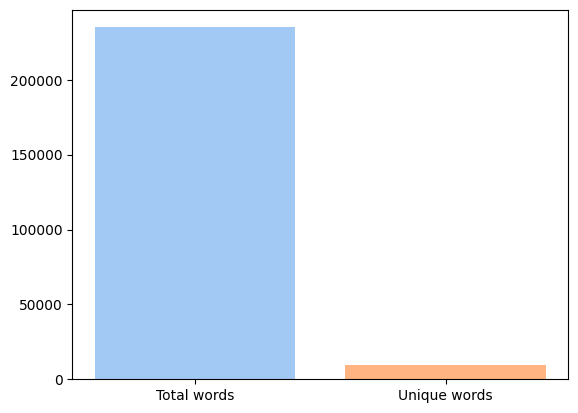

In [ ]:
plt.bar(x = ["Total words", "Unique words"],
        height=[len(gt.split()), len(set(gt.split()))],
        color=sns.color_palette('pastel'))

In [ ]:
sequences_doc = []
seq_len = 50
l = seq_len + 1
tokens = [w for w in gt.split()]

for i in range(l, len(tokens)):

    seq = tokens[i-l:i]

    line = ' '.join(seq)
    sequences_doc.append(line)

In [ ]:
sequences_doc

['a game of thrones book one of a song of ice and fire by george martin prologue should start gared urged as the woods began to grow dark around wildlings are the dead frighten ser waymar royce asked with just the hint of a gared did not rise to the he',
 'game of thrones book one of a song of ice and fire by george martin prologue should start gared urged as the woods began to grow dark around wildlings are the dead frighten ser waymar royce asked with just the hint of a gared did not rise to the he was',
 'of thrones book one of a song of ice and fire by george martin prologue should start gared urged as the woods began to grow dark around wildlings are the dead frighten ser waymar royce asked with just the hint of a gared did not rise to the he was an',
 'thrones book one of a song of ice and fire by george martin prologue should start gared urged as the woods began to grow dark around wildlings are the dead frighten ser waymar royce asked with just the hint of a gared did not rise 

In [ ]:
sequences_doc[:5]

['a game of thrones book one of a song of ice and fire by george martin prologue should start gared urged as the woods began to grow dark around wildlings are the dead frighten ser waymar royce asked with just the hint of a gared did not rise to the he',
 'game of thrones book one of a song of ice and fire by george martin prologue should start gared urged as the woods began to grow dark around wildlings are the dead frighten ser waymar royce asked with just the hint of a gared did not rise to the he was',
 'of thrones book one of a song of ice and fire by george martin prologue should start gared urged as the woods began to grow dark around wildlings are the dead frighten ser waymar royce asked with just the hint of a gared did not rise to the he was an',
 'thrones book one of a song of ice and fire by george martin prologue should start gared urged as the woods began to grow dark around wildlings are the dead frighten ser waymar royce asked with just the hint of a gared did not rise 

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sequences_doc)
sequences = tokenizer.texts_to_sequences(sequences_doc)

In [ ]:
mex_length=len(sequences[1])

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
tokenizer

In [ ]:
vocab_size

9689

In [ ]:
len(tokenizer.word_index)

9688

In [ ]:
sequences = np.array(sequences)


In [ ]:
X, y = sequences[:,:-1], sequences[:,-1]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)


In [ ]:
X.shape

(235011, 50)

In [ ]:
seq_length = X.shape[1]

In [ ]:
len(X)

235011

In [ ]:
y.shape

(235011, 9689)

In [ ]:
seq_length

50

In [ ]:
vocab_size

9689

In [ ]:
def create_model(seq_len, vocab_size):
    input_len = seq_len
    model = Sequential()
    model.add(Embedding(vocab_size, 10, input_length=input_len))

    model.add(LSTM(100))
    model.add(Dropout(0.1))

    model.add(Dense(100, activation='relu'))
    model.add(Dense(vocab_size, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    return model

model = create_model(seq_length, vocab_size)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 10)            96890     
                                                                 
 lstm (LSTM)                 (None, 100)               44400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 9689)              978589    
                                                                 
Total params: 1,129,979
Trainable params: 1,129,979
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X, y, batch_size=128, epochs=30)

Epoch 1/30
1837/1837 [==============================] - 281s 151ms/step - loss: 6.2928
Epoch 2/30
1837/1837 [==============================] - 268s 146ms/step - loss: 5.8898
Epoch 3/30
1837/1837 [==============================] - 276s 150ms/step - loss: 5.6392
Epoch 4/30
1837/1837 [==============================] - 275s 150ms/step - loss: 5.4661
Epoch 5/30
1837/1837 [==============================] - 272s 148ms/step - loss: 5.3375
Epoch 6/30
1837/1837 [==============================] - 277s 151ms/step - loss: 5.2243
Epoch 7/30
1837/1837 [==============================] - 275s 150ms/step - loss: 5.1281
Epoch 8/30
1837/1837 [==============================] - 271s 147ms/step - loss: 5.0437
Epoch 9/30
1837/1837 [==============================] - 274s 149ms/step - loss: 4.9688
Epoch 10/30
1837/1837 [==============================] - 271s 147ms/step - loss: 4.9005
Epoch 11/30
1837/1837 [==============================] - 266s 145ms/step - loss: 4.8391
Epoch 12/30
1837/1837 [==================

In [ ]:
model.save("txt_gen_model.h5")